In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


#File
clean_data= Path('Project-1/clean.csv')

#Read csv
clean_data_df= pd.read_csv(clean_data)
clean_data_df.head()


,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_owner,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,NİMET ARİF KURTEL,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,AHMET KURT,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,BÜLENT BAYBURAN,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,DİLEK ÖKTEN,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,SEMİH KATI,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51


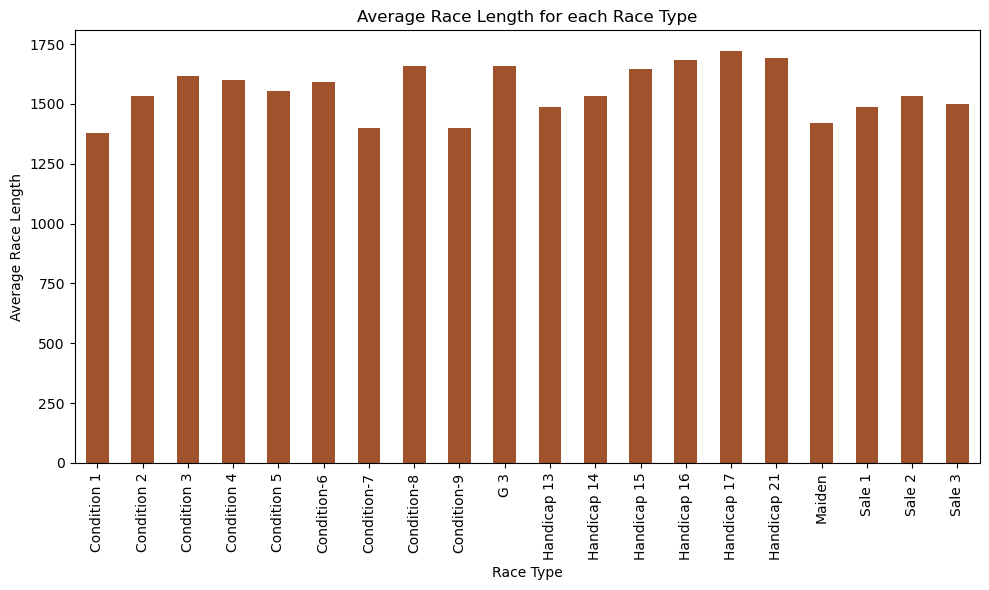

In [2]:
#What is the average race length for each race type? 
avg_race_length = clean_data_df.groupby('race_type')['race_length'].mean()


# Create a bar plot for average race length by race type
plt.figure(figsize=(10, 6))
avg_race_length.plot(kind='bar', color='sienna')
plt.title('Average Race Length for each Race Type')
plt.xlabel('Race Type')
plt.ylabel('Average Race Length')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [3]:
#Are there specific race types where certain horses or jockeys perform particularly well?
#Get the 1st place performers

#horse_jockey pair
horse_jockey_performance = clean_data_df.groupby(['race_type', 'horse_name', 'jockey_name']).agg({'result': 'min'}).reset_index()

#store results
results = []

#analyze performance of horses and jockeys across different race types
for race_type in horse_jockey_performance['race_type'].unique():
    race_type_data = horse_jockey_performance[horse_jockey_performance['race_type'] == race_type]

    #finishing position of 0 means that the horse did not finish the race or was disqualified
    #exclude performers with a finishing position of 0 and find the next lowest finish position
    next_top_performer = race_type_data[race_type_data['result'] != 0]['result'].nsmallest(1)
    
    #check if there are any performers with a finishing position other than 0
    if not next_top_performer.empty:
        next_top_performer = race_type_data[race_type_data['result'] == next_top_performer.iloc[0]].iloc[0]
        
        results.append({
            'Race Type': next_top_performer['race_type'],
            'Horse Name': next_top_performer['horse_name'],
            'Jockey Name': next_top_performer['jockey_name'],
            'Finishing Position': next_top_performer['result']
        })

first_place_df = pd.DataFrame(results)

#display the 1st place performers for each race type
first_place_df

,Race Type,Horse Name,Jockey Name,Finishing Position
0,Condition 1,ASTAMUR,NEVZAT AVCİ,1
1,Condition 2,ALACAATLI,AZİZ AKDEMİR,1
2,Condition 3,AKINCI,AKIN SÖZEN,1
3,Condition 4,AHMET IN MY HEART,MAHMUT ÜNLÜ,1
4,Condition 5,AKATAHAN,AYHAN KURŞUN,1
5,Condition-6,ALTUĞBEY,MEHMET DOĞAN,1
6,Condition-7,MIND AND LIFE,MÜSLÜM ÇELİK,1
7,Condition-8,BOZKARA,AZİZ AKDEMİR,1
8,Condition-9,HALİM AĞA,ÖZCAN YILDIRIM,1
9,G 3,CAPTAIN FANTASTIC,SADETTİN BOYRAZ,1
